## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16, ResNet50, ResNet152, VGG19
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'E:\\mldata\\train'
val =   'E:\\mldata\\val'
test =  'E:\\mldata\\test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [3]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [4]:
# train set size
nb_train_samples = train_generator.n
# validation set size
nb_validation_samples = val_generator.n
# test set size
nb_test_samples = test_generator.n

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [19]:
custom_model = Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3)),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
        layers.Activation('relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid'),
    ]
)

In [5]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9403040688303879923
]


In [20]:
custom_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
# use generator for training the model ("fit" method analog)
res = custom_model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=16,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

print(res)

Epoch 1/16
312/312 [==============================] - 153s 492ms/step - loss: 0.5854 - accuracy: 0.6838 - val_loss: 0.5158 - val_accuracy: 0.7471

In [9]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH


In [16]:
print(res.epoch)
print(res.history)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
{'loss': [0.6448681950569153, 0.5195596814155579, 0.45835745334625244, 0.400252103805542, 0.3534487187862396, 0.3131537139415741, 0.2594713866710663, 0.21307191252708435, 0.16926364600658417, 0.14711566269397736, 0.12010208517313004, 0.10758224129676819, 0.09154584258794785, 0.07417476922273636, 0.06736607104539871, 0.06225288286805153], 'accuracy': [0.6123093962669373, 0.740319013595581, 0.7852126955986023, 0.8193719983100891, 0.8489165306091309, 0.8674759268760681, 0.89215487241745, 0.9117676615715027, 0.932483971118927, 0.9418138265609741, 0.9556079506874084, 0.9575642347335815, 0.9652889370918274, 0.9714586734771729, 0.9753711819648743, 0.9767255187034607], 'val_loss': [0.5463191866874695, 0.4975202977657318, 0.4459877908229828, 0.4124923348426819, 0.40635815262794495, 0.39502501487731934, 0.3952319324016571, 0.4798935353755951, 0.45945850014686584, 0.4430241286754608, 0.518462598323822, 0.49485448002815247, 0.5573296546936035,

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = custom_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

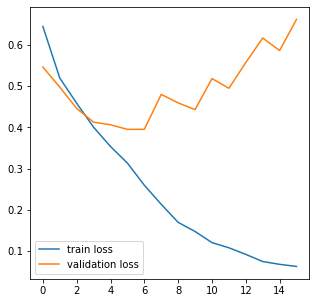

<Figure size 432x288 with 0 Axes>

In [29]:
fig = plt.figure(figsize = (5,5))
plt.plot(res.epoch, res.history['loss'], label="train loss")
plt.plot(res.epoch, res.history['val_loss'], label="validation loss")
plt.legend()
plt.show()
plt.clf()

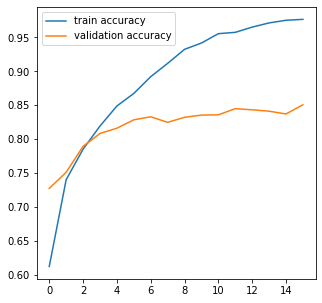

<Figure size 432x288 with 0 Axes>

In [30]:
fig = plt.figure(figsize = (5,5))
plt.plot(res.epoch, res.history['accuracy'], label="train accuracy")
plt.plot(res.epoch, res.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.show()
plt.clf()

Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [6]:
# First, download the weights of the vgg19 network trained on the ImageNet dataset:

vgg_19_net = VGG19(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg_19_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights RESNET_50 in the process of learning will remain unchanged!

                     # pay attention to the number of trained and untrained parameters

80142336/80134624 [==============================] - 21s 0us/step - ETA: 59s

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [7]:
# add layers to VGG16:

model = Sequential()
model.add(vgg_19_net)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# + flattening
# + Dense fullyconnected layer with 256 neurons
# + ReLu
# + Dropout
# + Dense layer with 1 neuron
# + sigmoid

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])


In [9]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

res = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
312/312 [==============================] - 1256s 4s/step - loss: 0.5344 - accuracy: 0.7260 - val_loss: 0.3877 - val_accuracy: 0.8438

In [10]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy on test data: 87.22%


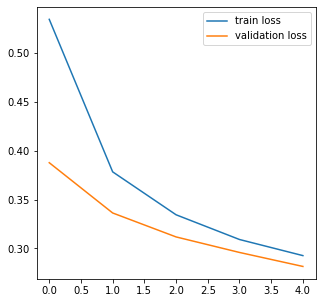

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize = (5,5))
plt.plot(res.epoch, res.history['loss'], label="train loss")
plt.plot(res.epoch, res.history['val_loss'], label="validation loss")
plt.legend()
plt.show()
plt.clf()

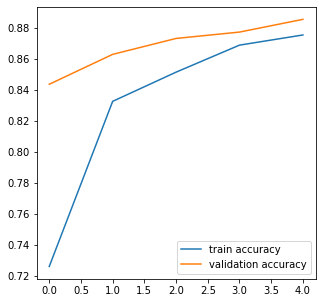

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize = (5,5))
plt.plot(res.epoch, res.history['accuracy'], label="train accuracy")
plt.plot(res.epoch, res.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.show()
plt.clf()

well here I swapped in honor to decrease comuptation time....

now vgg16

In [5]:
# First, download the weights of the RESNET_50 network trained on the ImageNet dataset:

vg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights RESNET_50 in the process of learning will remain unchanged!

model_vg16 = Sequential()
model_vg16.add(vg16_net)
model_vg16.add(Flatten())
model_vg16.add(Dense(256, activation="relu"))
model_vg16.add(layers.Dropout(0.5))
model_vg16.add(layers.Dense(1, activation='sigmoid'))


model_vg16.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5),
              metrics=['accuracy'])
model_vg16.summary()

res_vgg16 = model_vg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
312/312 [=======

In [6]:
scores = model_vg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy on test data: 88.98%


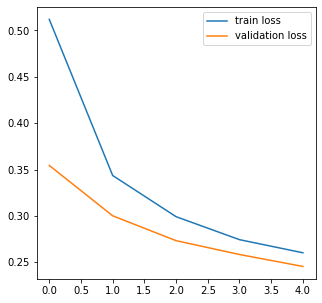

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure(figsize = (5,5))
plt.plot(res_vgg16.epoch, res_vgg16.history['loss'], label="train loss")
plt.plot(res_vgg16.epoch, res_vgg16.history['val_loss'], label="validation loss")
plt.legend()
plt.show()
plt.clf()

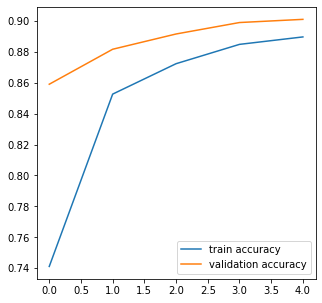

<Figure size 432x288 with 0 Axes>

In [12]:
fig = plt.figure(figsize = (5,5))
plt.plot(res_vgg16.epoch, res_vgg16.history['accuracy'], label="train accuracy")
plt.plot(res_vgg16.epoch, res_vgg16.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.show()
plt.clf()

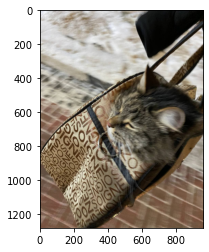

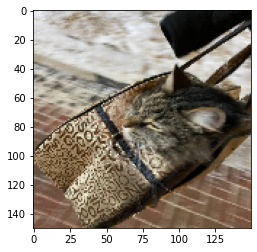

In [27]:
import tensorflow as tf

img = mpimg.imread('E:\\mldata\\cat_with_bag.jpg')
imgplot = plt.imshow(img)
plt.show()

resize_image = tf.image.resize(img, [150, 150], method='nearest')

imgplot = plt.imshow(resize_image)
plt.show()

In [28]:
# process the cat data...
import numpy as np
from keras.preprocessing import image
"""
datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

scores = custom_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
"""

test_image = image.img_to_array(resize_image)
test_image = np.expand_dims(test_image,axis=0)

In [32]:
cat_or_dog_custom_model = custom_model.predict(test_image)
cat_or_dog_custom_resnet = model.predict(test_image)
cat_or_dog_custom_vgg16 = model_vg16.predict(test_image)

print("custom model", cat_or_dog_custom_model)
print("resnet", cat_or_dog_custom_resnet)
print("vgg16", cat_or_dog_custom_vgg16)

custom model [[0.]]
resnet [[0.9981005]]
vgg16 [[1.]]


therefore, custom model couldn't find the cat, but pretrained resnet and vgg found it successfully

In [33]:
import math
# Develop the function for the inference of the best algorithm.

def is_best(input_image, trust_label, model_a, model_b, model_c):
    answer_a = math.sqrt((model_a.predict(input_image)[0][0] - trust_label)**2)
    answer_b = math.sqrt((model_b.predict(input_image)[0][0] - trust_label)**2)
    answer_c = math.sqrt((model_c.predict(input_image)[0][0] - trust_label)**2)
    if answer_a < answer_b and answer_a < answer_c:
        return model_a
    if answer_b < answer_a and answer_b < answer_c:
        return model_b
    if answer_c < answer_b and answer_c < answer_a:
        return model_c

In [35]:
best_model = is_best(test_image, 1, custom_model, model, model_vg16)
print(best_model)
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
re_lu_1 (ReLU)               (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
__________________________________